In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.utilities.lambdify import lambdify

from scipy.io import loadmat
import scipy.linalg as spl
import RisolviSis as utils

import math

In [3]:
def jacobi(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    n=A.shape[0]
    invM=np.diag(1/d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    N=-(E+F)
    T=np.dot(invM,N)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
    #xold=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        x=(b+np.dot(N,x0))/d.reshape(n,1)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F
    T=np.dot(np.linalg.inv(M),N)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore>=toll:
        temp=b-np.dot(F,x0)
        x,flag=utils.Lsolve(M,temp)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

Numero di righe:  200  Numero di colonne:  200
Percentuale di elementi non nulli:  2.48 %
La matrice è simmetrica
La matrice è definita positiva
Il numero di condizionamento della matrice è:  7.667447334494148
La matrice è a diagonale dominante:  True
raggio spettrale Gauss-Seidel  0.6323844622504192
Numero di iterazioni:  30
Errore:  8.111310036607249e-09


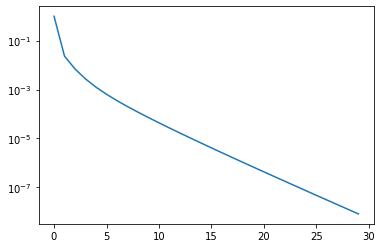

raggio spettrale jacobi 0.7692515543716639
Numero di iterazioni:  50
Errore:  9.531620301622235e-09


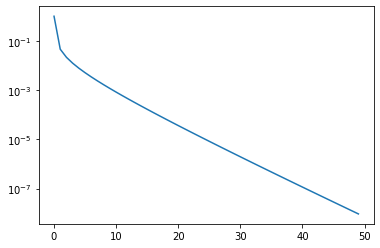

In [5]:
dati = loadmat('test10.mat')
A=dati['A']
b=dati['b']
# calcolo il numero di righe e di colonne della matrice A
n,m = A.shape
print("Numero di righe: ",n , " Numero di colonne: ", m)
# controllo se la matrice è densa o sparsa
nz = np.count_nonzero(A)/(n*m)
perc_nz = nz*100
print("Percentuale di elementi non nulli: ", perc_nz, "%") # matrice sparsa
# Controllo se la matrice è simmetrica
if (A.transpose() == A).all():
    print("La matrice è simmetrica")
else :
    print("La matrice non è simmetrica")
# Controllo se la matrice è definita positiva
if np.all(np.linalg.eigvals(A) > 0):
    print("La matrice è definita positiva")
else :
    print("La matrice non è definita positiva")
# Controllo se la matrice è mal condizionata
cond = np.linalg.cond(A)
print("Il numero di condizionamento della matrice è: ", cond)

def verifica_dd(A):
    n=A.shape[0]
    flag=True
    for i in range(n):
        el_diag=np.abs(A[i,i])
        sum_extradiag=np.sum(np.abs(A[i,:]))-np.abs(A[i,i])
        if el_diag< sum_extradiag:
            print("Matrice non a diagonale  dominante")
            flag=False
            return flag
    return flag
dd=verifica_dd(A)
print("La matrice è a diagonale dominante: ",dd)
    
# se la matrice è simmetrica e definita positiva allora posso usare il metodo di Gauss-Seidel
x0 = np.zeros( (n,1) )
toll = 1e-8
it_max = 1000
x,it,er_vet = gauss_seidel(A,b,x0,toll,it_max)
print("Numero di iterazioni: ", it)
print("Errore: ", er_vet[-1]) # errore dell'ultima iterazione
plt.semilogy(er_vet)
plt.show()

# ora uso il metodo di Jacobi
x0 = np.zeros( (n,1) )
toll = 1e-8
it_max = 1000
x,it,er_vet = jacobi(A,b,x0,toll,it_max)
print("Numero di iterazioni: ", it)
print("Errore: ", er_vet[-1]) # errore dell'ultima iterazione
plt.semilogy(er_vet)
plt.show()


In [6]:
dati = loadmat('test11.mat')
A=dati['A']
b=dati['b']
# calcolo il numero di righe e di colonne della matrice A
n,m = A.shape
print("Numero di righe: ",n , " Numero di colonne: ", m)
# controllo se la matrice è densa o sparsa
nz = np.count_nonzero(A)/(n*m)
perc_nz = nz*100
print("Percentuale di elementi non nulli: ", perc_nz, "%") # matrice sparsa
# Controllo se la matrice è simmetrica
if (A.transpose() == A).all():
    print("La matrice è simmetrica")
else :
    print("La matrice non è simmetrica")
# Controllo se la matrice è definita positiva
if np.all(np.linalg.eigvals(A) > 0):
    print("La matrice è definita positiva")
else :
    print("La matrice non è definita positiva")
# Controllo se la matrice è mal condizionata
cond = np.linalg.cond(A)
print("Il numero di condizionamento della matrice è: ", cond)

def verifica_dd(A):
    n=A.shape[0]
    flag=True
    for i in range(n):
        el_diag=np.abs(A[i,i])
        sum_extradiag=np.sum(np.abs(A[i,:]))-np.abs(A[i,i])
        if el_diag< sum_extradiag:
            print("Matrice non a diagonale  dominante")
            flag=False
            return flag
    return flag
dd=verifica_dd(A)
print("La matrice è a diagonale dominante: ",dd)

Numero di righe:  225  Numero di colonne:  225
Percentuale di elementi non nulli:  2.1037037037037036 %
La matrice è simmetrica
La matrice è definita positiva
Il numero di condizionamento della matrice è:  103.08686891981739
La matrice è a diagonale dominante:  True


In [10]:
dati = loadmat('test13.mat')
A=dati['A']
b=dati['b']
# calcolo il numero di righe e di colonne della matrice A
n,m = A.shape
print("Numero di righe: ",n , " Numero di colonne: ", m)
# controllo se la matrice è densa o sparsa
nz = np.count_nonzero(A)/(n*m)
perc_nz = nz*100
print("Percentuale di elementi non nulli: ", perc_nz, "%") # matrice sparsa
# Controllo se la matrice è mal condizionata
cond = np.linalg.cond(A)
print("Il numero di condizionamento della matrice è: ", cond)
def verifica_dd(A):
    n=A.shape[0]
    flag=True
    for i in range(n):
        el_diag=np.abs(A[i,i])
        sum_extradiag=np.sum(np.abs(A[i,:]))-np.abs(A[i,i])
        if el_diag< sum_extradiag:
            print("Matrice non a diagonale  dominante")
            flag=False
            return flag
    return flag
dd=verifica_dd(A)
print("La matrice è a diagonale dominante: ",dd)

Numero di righe:  70  Numero di colonne:  10
Percentuale di elementi non nulli:  100.0 %
Il numero di condizionamento della matrice è:  9.999999999999996
Matrice non a diagonale  dominante
La matrice è a diagonale dominante:  False


In [12]:
dati = loadmat('test14.mat')
A=dati['A']
b=dati['b']
# calcolo il numero di righe e di colonne della matrice A
n,m = A.shape
print("Numero di righe: ",n , " Numero di colonne: ", m)
# controllo se la matrice è densa o sparsa
nz = np.count_nonzero(A)/(n*m)
perc_nz = nz*100
print("Percentuale di elementi non nulli: ", perc_nz, "%") # matrice sparsa
# Controllo se la matrice è mal condizionata
cond = np.linalg.cond(A)
print("Il numero di condizionamento della matrice è: ", cond)

def verifica_dd(A):
    n=A.shape[0]
    flag=True
    for i in range(n):
        el_diag=np.abs(A[i,i])
        sum_extradiag=np.sum(np.abs(A[i,:]))-np.abs(A[i,i])
        if el_diag< sum_extradiag:
            print("Matrice non a diagonale  dominante")
            flag=False
            return flag
    return flag
dd=verifica_dd(A)
print("La matrice è a diagonale dominante: ",dd)

Numero di righe:  80  Numero di colonne:  15
Percentuale di elementi non nulli:  100.0 %
Il numero di condizionamento della matrice è:  2.3856247448204716e+16
Matrice non a diagonale  dominante
La matrice è a diagonale dominante:  False


In [14]:
dati = loadmat('test15.mat')
A=dati['A']
b=dati['b']
# calcolo il numero di righe e di colonne della matrice A
n,m = A.shape
print("Numero di righe: ",n , " Numero di colonne: ", m)
# controllo se la matrice è densa o sparsa
nz = np.count_nonzero(A)/(n*m)
perc_nz = nz*100
print("Percentuale di elementi non nulli: ", perc_nz, "%") # matrice sparsa
# Controllo se la matrice è mal condizionata
cond = np.linalg.cond(A)
print("Il numero di condizionamento della matrice è: ", cond)

def verifica_dd(A):
    n=A.shape[0]
    flag=True
    for i in range(n):
        el_diag=np.abs(A[i,i])
        sum_extradiag=np.sum(np.abs(A[i,:]))-np.abs(A[i,i])
        if el_diag< sum_extradiag:
            print("Matrice non a diagonale  dominante")
            flag=False
            return flag
    return flag
dd=verifica_dd(A)
print("La matrice è a diagonale dominante: ",dd)

Numero di righe:  80  Numero di colonne:  15
Percentuale di elementi non nulli:  100.0 %
Il numero di condizionamento della matrice è:  1000.000000000002
Matrice non a diagonale  dominante
La matrice è a diagonale dominante:  False
